#Please Refer to the Read.me page in this link.
https://github.com/ZeC-bit/KYC-OCR-Project/blob/main/README.md

In [ ]:
#Question 1. KYC and AML

In [56]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy
!pip install -U pip jsoncomparison

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [2]:
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.7.1+cpu (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2, 2.1.0, 2.1.0+cpu, 2.1.0+cpu.cxx11.abi, 2.1.0+cu118, 2.1.0+cu121, 2.1.

#1. Reading image files from Google Drive

In [3]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


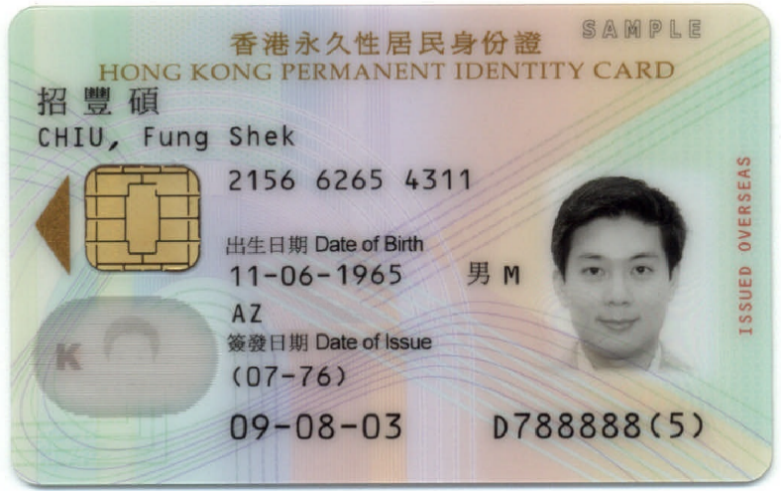

In [4]:
from IPython.display import Image
Image('/gdrive/My Drive/kyc/hkidSample.png') ## HKID Information

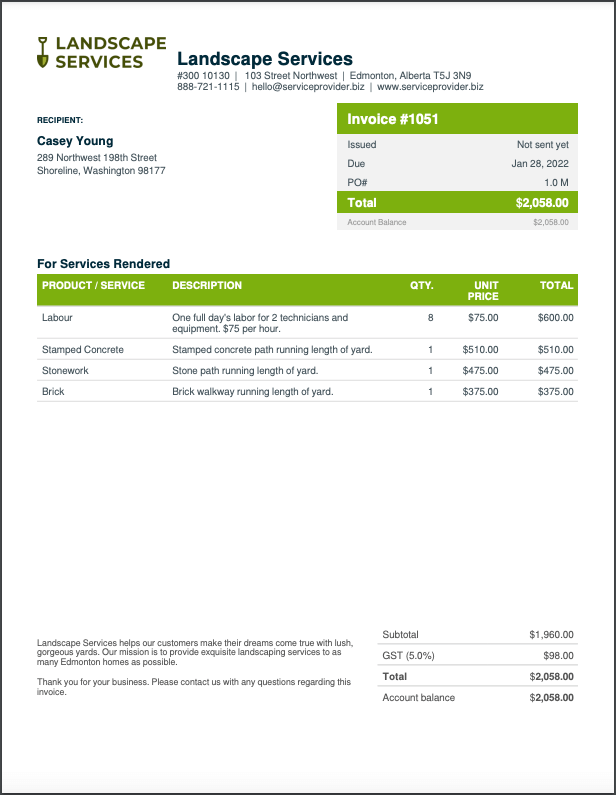

In [5]:
Image('/gdrive/My Drive/kyc/informationSample.jpg') ## Personal Information of the Customer

In [44]:
import cv2
import numpy as np
import pandas as pd
import json
import os
import easyocr
import urllib
import io
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
im_1_path = '/gdrive/My Drive/kyc/hkidSample.png'
im_2_path = '/gdrive/My Drive/kyc/informationSample.jpg'


In [20]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''

    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [24]:
result = recognize_text(im_1_path)

In [25]:
result

[([[576, 14], [708, 14], [708, 44], [576, 44]], 'SAMPLE', 0.7566931944652333),
 ([[224, 24], [549, 24], [549, 64], [224, 64]],
  '#1x71ER461',
  0.0325319032779643),
 ([[94, 58], [678, 58], [678, 84], [94, 84]],
  'HONG KONG PERMANENT IDENTITY CARD',
  0.7577993583498864),
 ([[31, 81], [165, 81], [165, 123], [31, 123]], '# % @', 0.5022772153740567),
 ([[34, 124], [124, 124], [124, 156], [34, 156]], 'CHIU ,', 0.788580575214395),
 ([[137, 123], [214, 123], [214, 156], [137, 156]],
  'Fung',
  0.9998358488082886),
 ([[226, 122], [300, 122], [300, 152], [226, 152]], 'Shek', 0.999473512172699),
 ([[224, 166], [300, 166], [300, 196], [224, 196]],
  '2156',
  0.9269122621690242),
 ([[312, 164], [388, 164], [388, 196], [312, 196]], '6265', 0.990030848149623),
 ([[402, 164], [476, 164], [476, 196], [402, 196]],
  '4311',
  0.9992089867591858),
 ([[222, 230], [428, 230], [428, 260], [222, 260]],
  '#KEA#tg Date of Birth',
  0.12048879441395849),
 ([[730, 151], [757, 151], [757, 256], [730, 256]]

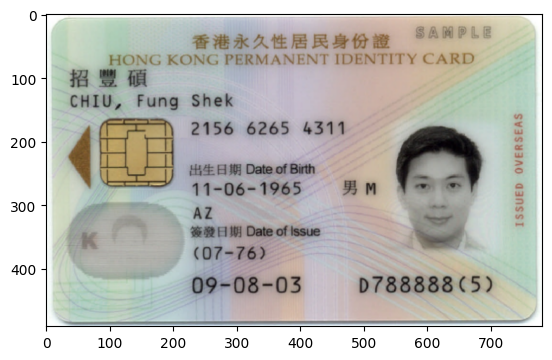

In [26]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

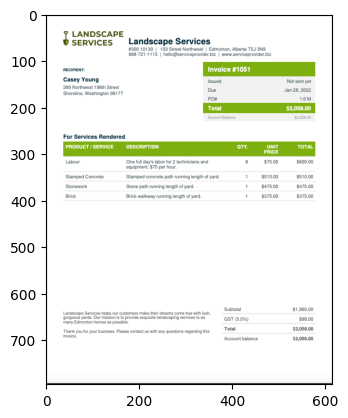

In [27]:
img_2 = cv2.imread(im_2_path)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_2)

In [28]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''

    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height))
    axarr[0].imshow(img)

    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)

    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./output/{save_name}_overlay.jpg', bbox_inches='tight')

#3. Draw Bounding Boxes in Multiple Lines

0 SAMPLE
1 #1x71ER461
2 HONG KONG PERMANENT IDENTITY CARD
3 # % @
4 CHIU ,
5 Fung
6 Shek
7 2156
8 6265
9 4311
10 #KEA#tg Date of Birth
11 1
12 11-06-1965
13 9} M
14 Az
15 1
16 S#HI Date of Issue
17 K
18 (07-76)
19 09-08-03
20 D788888 ( 5)


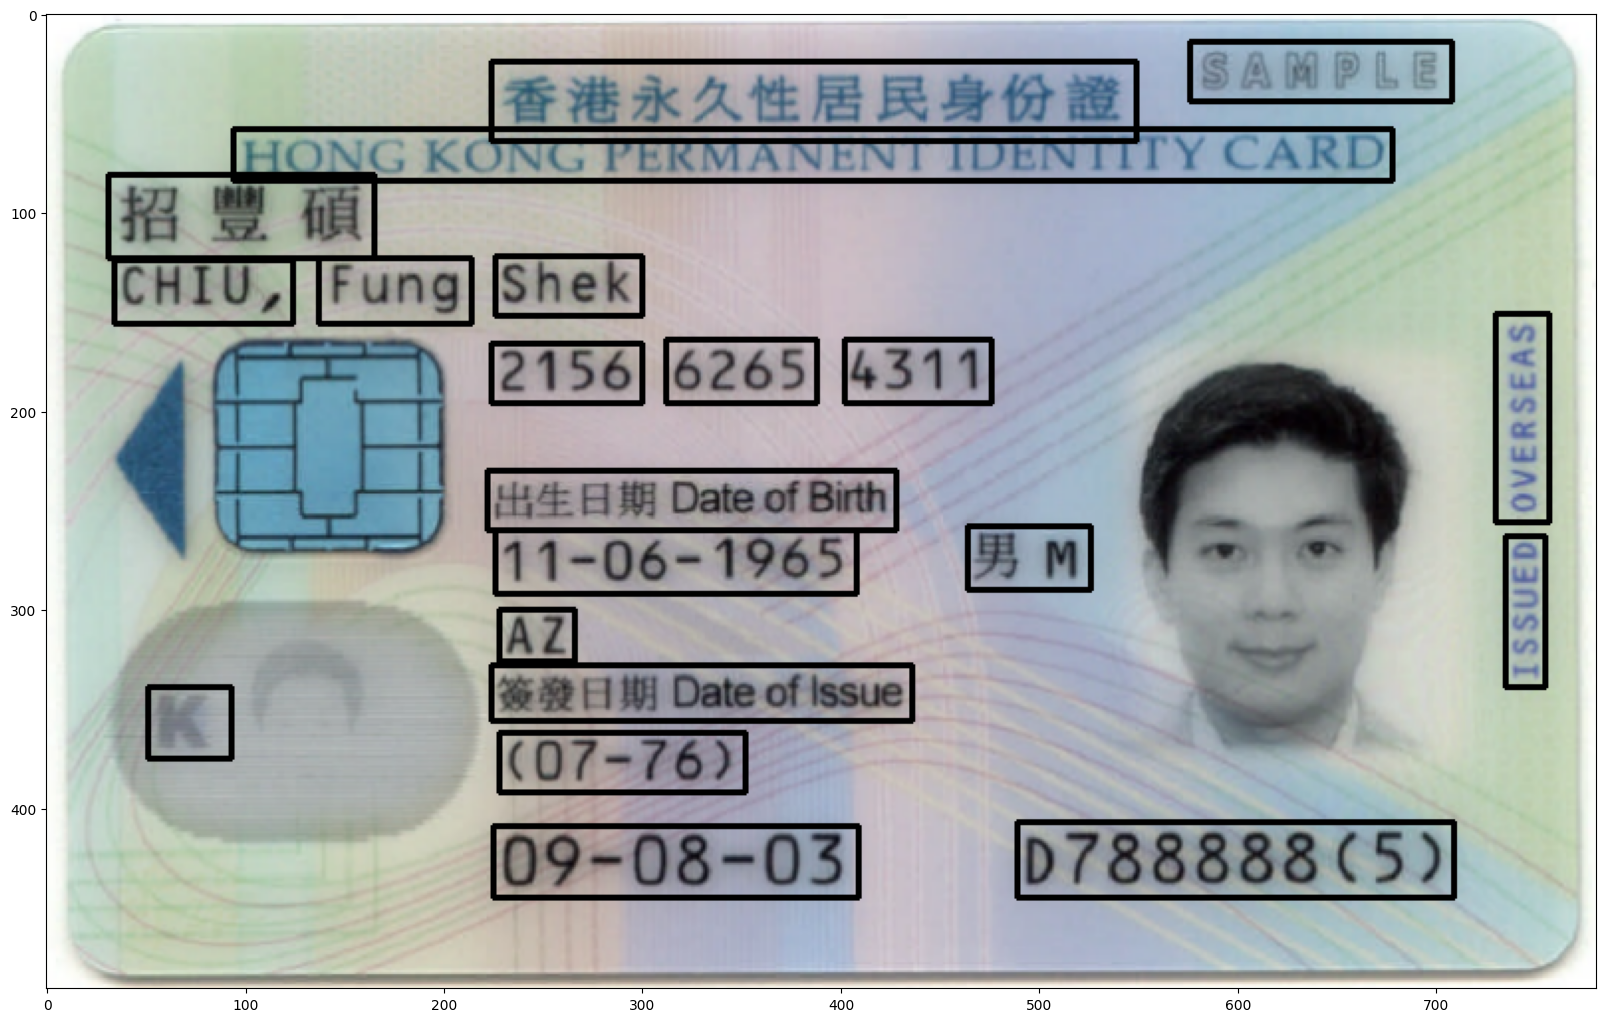

In [29]:
img = cv2.imread(im_1_path)
# Image size with DPI
plt.figure(figsize=(20, 20), dpi=100)
i = 0
for detection in result:
  # Top left coordinate
    top_left = tuple([int (val) for val in detection[0][0]])
  # Bottom right coordinate
    bottom_right = tuple([int (val) for val in detection[0][2]])
  # Text extraction
    text = detection[1]
    print(str(i)+' '+text)
  # Draw Rectangle
    img = cv2.rectangle(img,top_left,bottom_right,(0,0,0),2)
    i+=1

plt.imshow(img)
plt.savefig('Detected_Text.png')
plt.show()

In [30]:
text = [result[res][1] for res in range(len(result))]
text

['SAMPLE',
 '#1x71ER461',
 'HONG KONG PERMANENT IDENTITY CARD',
 '# % @',
 'CHIU ,',
 'Fung',
 'Shek',
 '2156',
 '6265',
 '4311',
 '#KEA#tg Date of Birth',
 '1',
 '11-06-1965',
 '9} M',
 'Az',
 '1',
 'S#HI Date of Issue',
 'K',
 '(07-76)',
 '09-08-03',
 'D788888 ( 5)']

In [32]:
result = recognize_text(im_2_path)

0 LANDSCAPE
1 SERVICES
2 Landscape Services
3 #300 10130
4 03 Sireet Norhiwest
5 Edrionton; Alberta T5J 3N9
6 888-721-1115
7 nellb@serviceprovider_Diz
8 WW/A.serviceprovider biz
9 AECIPIENT:
10 Invoice #1051
11 Casey Young
12 Issued
13 Nol sent yel
14 289 Norlnwesi 198ih Streel
15 Jan 28, 2022
16 Shoreline, Washinglon 98177
17 PO#
18 1.0 M
19 Total
20 32,058.00
21 Ceccot
22 12,L50 C
23 For Services Rendered
24 product
25 service
26 deScriPtION
27 QTY:
28 UnI
29 TOTAL
30 price
31 Labcur
32 Cne Iull day $ labor Ior =
33 lecnnicians &nd
34 575.00
35 Sed0.00
36 equipmenl 575 per nour:
37 Startiped Corcrete
38 Slamped concrele palh running lenglh l yard
39 8510.00
40 8510.00
41 Slonpwctk
42 Sione paln rurning lerigth ol yard_
43 $475.00
44 3475.00
45 Brick
46 Brick walkway running length ol yard.
47 8375.00
48 5375.00
49 Sublolal
50 51,960.00
51 Landscane Senices Falds Oir cstomers Make thelr dream:
52 cmarnue
53 Corgeou3 /303
54 O1 Misgipn I5 10 provice exkglte [andscapina :E ices
55 GST (

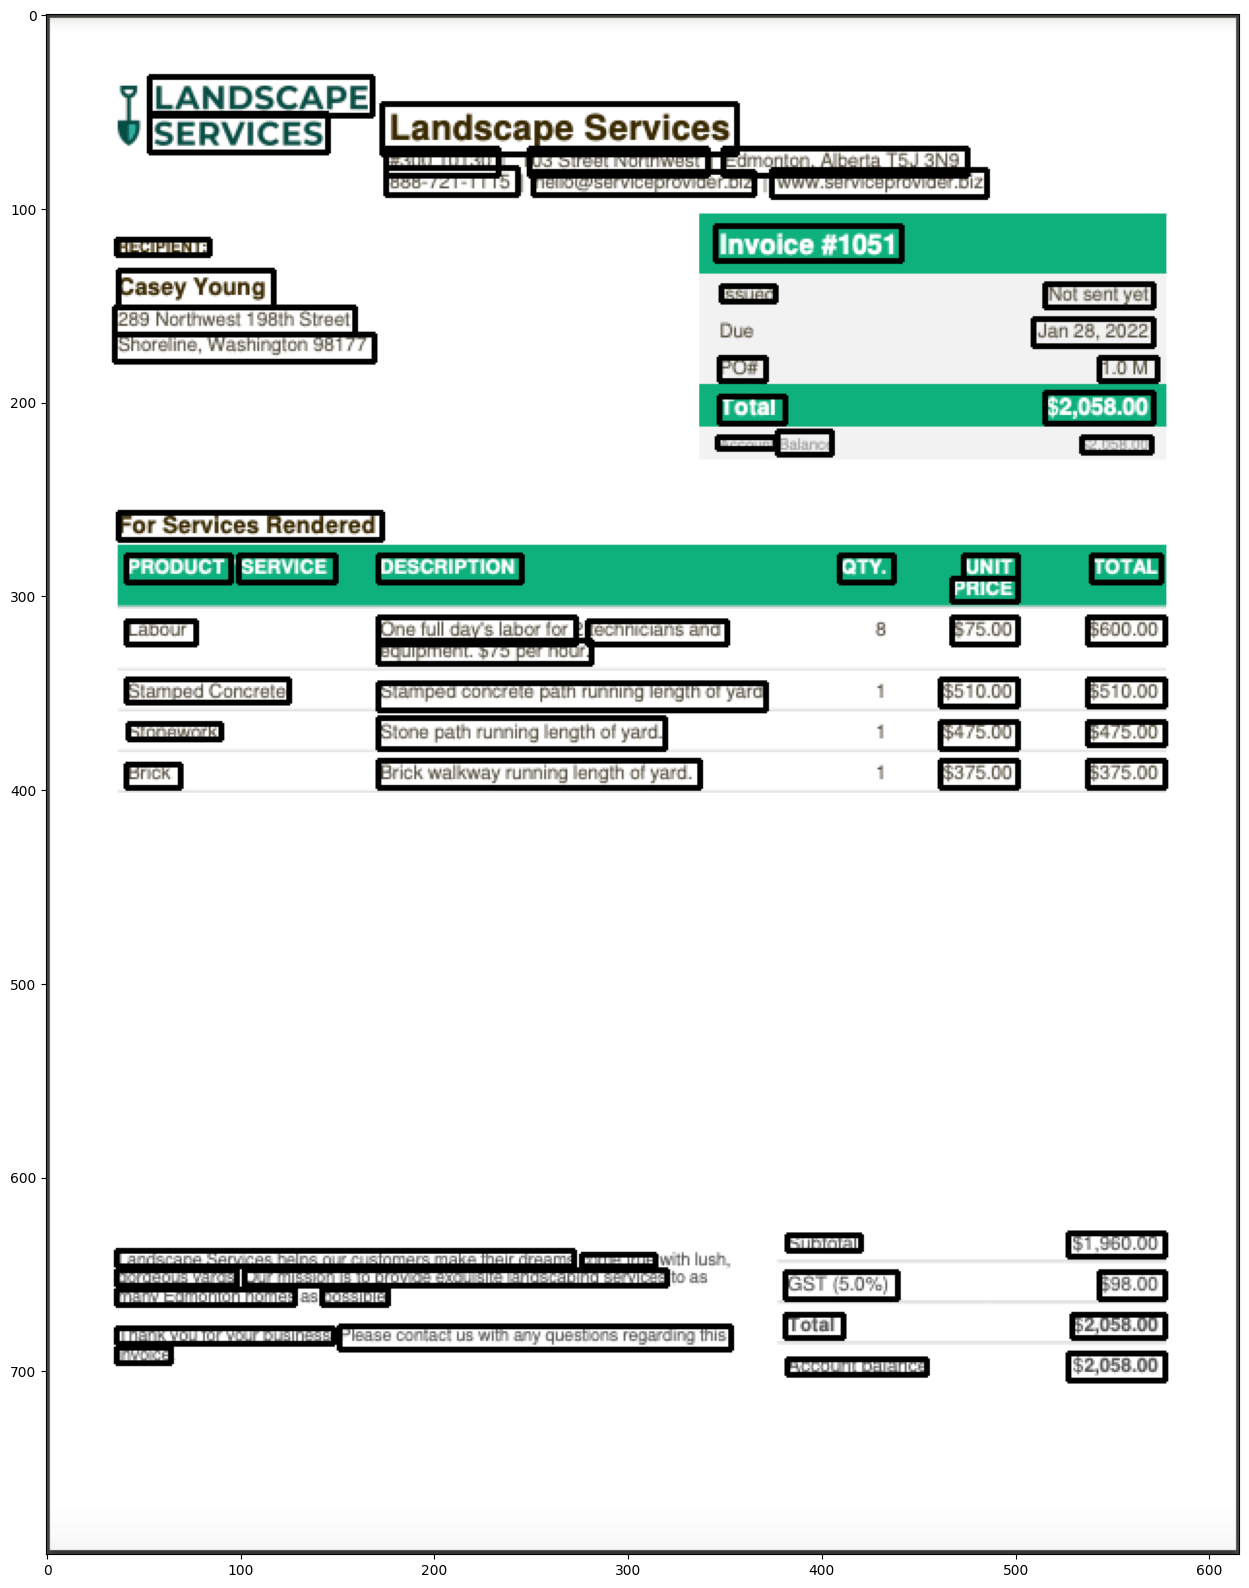

In [33]:
img = cv2.imread(im_2_path)
# Image size with DPI
plt.figure(figsize=(20, 20), dpi=100)
i = 0
for detection in result:
  # Top left coordinate
    top_left = tuple([int (val) for val in detection[0][0]])
  # Bottom right coordinate
    bottom_right = tuple([int (val) for val in detection[0][2]])
  # Text extraction
    text = detection[1]
    print(str(i)+' '+text)
  # Draw Rectangle
    img = cv2.rectangle(img,top_left,bottom_right,(0,0,0),2)
    i+=1

plt.imshow(img)
plt.savefig('Detected_Text.png')
plt.show()

In [34]:
text = [result[res][1] for res in range(len(result))]
text

['LANDSCAPE',
 'SERVICES',
 'Landscape Services',
 '#300 10130',
 '03 Sireet Norhiwest',
 'Edrionton; Alberta T5J 3N9',
 '888-721-1115',
 'nellb@serviceprovider_Diz',
 'WW/A.serviceprovider biz',
 'AECIPIENT:',
 'Invoice #1051',
 'Casey Young',
 'Issued',
 'Nol sent yel',
 '289 Norlnwesi 198ih Streel',
 'Jan 28, 2022',
 'Shoreline, Washinglon 98177',
 'PO#',
 '1.0 M',
 'Total',
 '32,058.00',
 'Ceccot',
 '12,L50 C',
 'For Services Rendered',
 'product',
 'service',
 'deScriPtION',
 'QTY:',
 'UnI',
 'TOTAL',
 'price',
 'Labcur',
 'Cne Iull day $ labor Ior =',
 'lecnnicians &nd',
 '575.00',
 'Sed0.00',
 'equipmenl 575 per nour:',
 'Startiped Corcrete',
 'Slamped concrele palh running lenglh l yard',
 '8510.00',
 '8510.00',
 'Slonpwctk',
 'Sione paln rurning lerigth ol yard_',
 '$475.00',
 '3475.00',
 'Brick',
 'Brick walkway running length ol yard.',
 '8375.00',
 '5375.00',
 'Sublolal',
 '51,960.00',
 'Landscane Senices Falds Oir cstomers Make thelr dream:',
 'cmarnue',
 'Corgeou3 /303',


# 4. Prediction Score Histogram

Prediction_Score
0          0.998997
1          0.995329
2          0.812625
3          0.739384
4          0.705763

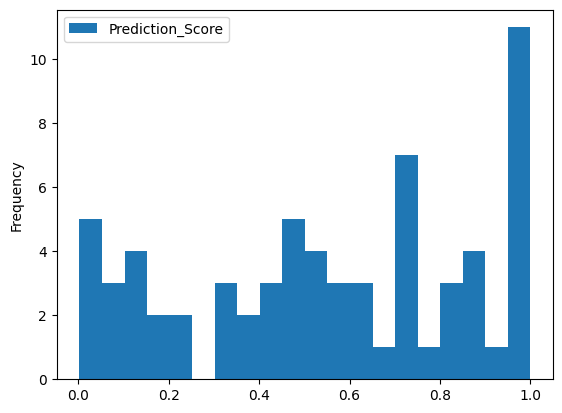

In [36]:
data = []
for i in range(len(result)):
  # Append the prediction score in the list
  data.append([result[i][2]])
  # Create the dataframe of the prediction score
  df = pd.DataFrame(data,columns=["Prediction_Score"])

display(df.head())
df.plot.hist(bins=20)
plt.savefig("Prediction_Score.png", dpi=100)

In [37]:
# Statistical Summary of score
df.describe()

Prediction_Score
count         67.000000
mean           0.552530
std            0.322105
min            0.002256
25%            0.314942
50%            0.579132
75%            0.822412
max            0.999909

#5. Write Output Text in the File

In [38]:
textfile = open("Output.txt", "w")
# Write output text in the file
for i in range(len(result)):
  textfile.write(str(i) +': ' + str([result[i][1]])+ "\n")

textfile.close()

#6.Extracting and storing Detected Bounding Boxes

In [58]:
# Create Directory to store patches
os.mkdir ('/content/Patches')
%cd '/content/Patches'

/content/OCR


In [59]:
for i in range(len(result)):
  X= int(result[i][0][0][0])            # //Column
  Y= int(result[i][0][0][1])            # //Row
  W= int(result[i][0][1][0])            # //Width
  H= int(result[i][0][2][1])            # //Height
# Slicing of particular boxes
  cropped_image = img[Y:Y+H, X:X+W]
# Save an image
  cv2.imwrite(str(i)+'.png', cropped_image)

In [60]:
# Zip the patches Folder
# /Destination /Source
!zip -r /content/Patches.zip /content/Patches

updating: content/Patches/ (stored 0%)
updating: content/Patches/64.png (deflated 37%)
updating: content/Patches/32.png (deflated 17%)
updating: content/Patches/30.png (deflated 33%)
updating: content/Patches/49.png (deflated 33%)
updating: content/Patches/25.png (deflated 16%)
updating: content/Patches/12.png (deflated 19%)
updating: content/Patches/13.png (deflated 21%)
updating: content/Patches/4.png (deflated 11%)
updating: content/Patches/28.png (deflated 36%)
updating: content/Patches/15.png (deflated 22%)
updating: content/Patches/58.png (deflated 29%)
updating: content/Patches/40.png (deflated 38%)
updating: content/Patches/23.png (deflated 12%)
updating: content/Patches/16.png (deflated 12%)
updating: content/Patches/59.png (deflated 35%)
updating: content/Patches/21.png (deflated 27%)
updating: content/Patches/54.png (deflated 25%)
updating: content/Patches/6.png (deflated 12%)
updating: content/Patches/8.png (deflated 14%)
updating: content/Patches/9.png (deflated 7%)
updati

In [53]:
# Download the patches folder
from google.colab import files
files.download("/content/Patches.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#7. Converting output text in Json format


In [67]:
import json

# Assuming you have extracted text data from images and stored it in a variable called `extracted_text`
extracted_text = """0: ['LANDSCAPE']
1: ['SERVICES']
2: ['Landscape Services']
3: ['#300 10130']
4: ['03 Sireet Norhiwest']
5: ['Edrionton; Alberta T5J 3N9']
6: ['888-721-1115']
7: ['nellb@serviceprovider_Diz']
8: ['WW/A.serviceprovider biz']
9: ['AECIPIENT:']
10: ['Invoice #1051']
11: ['Casey Young']
12: ['Issued']
13: ['Nol sent yel']
14: ['289 Norlnwesi 198ih Streel']
15: ['Jan 28, 2022']
16: ['Shoreline, Washinglon 98177']
17: ['PO#']
18: ['1.0 M']
19: ['Total']
20: ['32,058.00']
21: ['Ceccot']
22: ['12,L50 C']
23: ['For Services Rendered']
24: ['product']
25: ['service']
26: ['deScriPtION']
27: ['QTY:']
28: ['UnI']
29: ['TOTAL']
30: ['price']
31: ['Labcur']
32: ['Cne Iull day $ labor Ior =']
33: ['lecnnicians &nd']
34: ['575.00']
35: ['Sed0.00']
36: ['equipmenl 575 per nour:']
37: ['Startiped Corcrete']
38: ['Slamped concrele palh running lenglh l yard']
39: ['8510.00']
40: ['8510.00']
41: ['Slonpwctk']
42: ['Sione paln rurning lerigth ol yard_']
43: ['$475.00']
44: ['3475.00']
45: ['Brick']
46: ['Brick walkway running length ol yard.']
47: ['8375.00']
48: ['5375.00']
49: ['Sublolal']
50: ['51,960.00']
51: ['Landscane Senices Falds Oir cstomers Make thelr dream:']
52: ['cmarnue']
53: ['Corgeou3 /303']
54: ['O1 Misgipn I5 10 provice exkglte [andscapina :E ices']
55: ['GST (5.0%)']
56: ['598.00']
57: ["Meri' Edmonton homes"]
58: ['pos3ible']
59: ['Tolal']
60: ['32,058.00']
61: ['Knank"\'ouior curcubine3s']
62: ['Please contec: Us witn 24} quesbons regerding this']
63: ['MYcce']
64: ['AccounL palance']
65: ['82,058.00']
66: ['Jaakute']
"""

# Create a dictionary to store the extracted text
extracted_data = {
    "text": extracted_text
}

# Convert the dictionary to JSON format
json_data = json.dumps(extracted_data)

# Print the JSON data
print(json_data)

{"text": "0: ['LANDSCAPE']\n1: ['SERVICES']\n2: ['Landscape Services']\n3: ['#300 10130']\n4: ['03 Sireet Norhiwest']\n5: ['Edrionton; Alberta T5J 3N9']\n6: ['888-721-1115']\n7: ['nellb@serviceprovider_Diz']\n8: ['WW/A.serviceprovider biz']\n9: ['AECIPIENT:']\n10: ['Invoice #1051']\n11: ['Casey Young']\n12: ['Issued']\n13: ['Nol sent yel']\n14: ['289 Norlnwesi 198ih Streel']\n15: ['Jan 28, 2022']\n16: ['Shoreline, Washinglon 98177']\n17: ['PO#']\n18: ['1.0 M']\n19: ['Total']\n20: ['32,058.00']\n21: ['Ceccot']\n22: ['12,L50 C']\n23: ['For Services Rendered']\n24: ['product']\n25: ['service']\n26: ['deScriPtION']\n27: ['QTY:']\n28: ['UnI']\n29: ['TOTAL']\n30: ['price']\n31: ['Labcur']\n32: ['Cne Iull day $ labor Ior =']\n33: ['lecnnicians &nd']\n34: ['575.00']\n35: ['Sed0.00']\n36: ['equipmenl 575 per nour:']\n37: ['Startiped Corcrete']\n38: ['Slamped concrele palh running lenglh l yard']\n39: ['8510.00']\n40: ['8510.00']\n41: ['Slonpwctk']\n42: ['Sione paln rurning lerigth ol yard_']\n4

In [68]:
json_data

'{"text": "0: [\'LANDSCAPE\']\\n1: [\'SERVICES\']\\n2: [\'Landscape Services\']\\n3: [\'#300 10130\']\\n4: [\'03 Sireet Norhiwest\']\\n5: [\'Edrionton; Alberta T5J 3N9\']\\n6: [\'888-721-1115\']\\n7: [\'nellb@serviceprovider_Diz\']\\n8: [\'WW/A.serviceprovider biz\']\\n9: [\'AECIPIENT:\']\\n10: [\'Invoice #1051\']\\n11: [\'Casey Young\']\\n12: [\'Issued\']\\n13: [\'Nol sent yel\']\\n14: [\'289 Norlnwesi 198ih Streel\']\\n15: [\'Jan 28, 2022\']\\n16: [\'Shoreline, Washinglon 98177\']\\n17: [\'PO#\']\\n18: [\'1.0 M\']\\n19: [\'Total\']\\n20: [\'32,058.00\']\\n21: [\'Ceccot\']\\n22: [\'12,L50 C\']\\n23: [\'For Services Rendered\']\\n24: [\'product\']\\n25: [\'service\']\\n26: [\'deScriPtION\']\\n27: [\'QTY:\']\\n28: [\'UnI\']\\n29: [\'TOTAL\']\\n30: [\'price\']\\n31: [\'Labcur\']\\n32: [\'Cne Iull day $ labor Ior =\']\\n33: [\'lecnnicians &nd\']\\n34: [\'575.00\']\\n35: [\'Sed0.00\']\\n36: [\'equipmenl 575 per nour:\']\\n37: [\'Startiped Corcrete\']\\n38: [\'Slamped concrele palh running 

In [72]:
# Verify the required information
if "Chiu Fung Shek" in extracted_text and ("November 6th 1965" in extracted_text or "11-06-1965" in extracted_text):
    if "M" in extracted_text or "Gentleman" in extracted_text:
        if "09-08-03" in extracted_text or "September 8th 2003" in extracted_text:
            print("He is the correct person.")
        else:
            print("The date of issue is missing.")
    else:
        print("He is not the right person.")
else:
    print("He is not the right person.")

He is not the right person.


#8. Image Preprocessing Using Open CV

In [182]:
im_1_path = '/gdrive/My Drive/kyc/hkidSample.png'
im_2_path = '/gdrive/My Drive/kyc/informationSample.jpg'

In [183]:
src = cv2.imread('/gdrive/My Drive/kyc/hkidSample.png', 1)

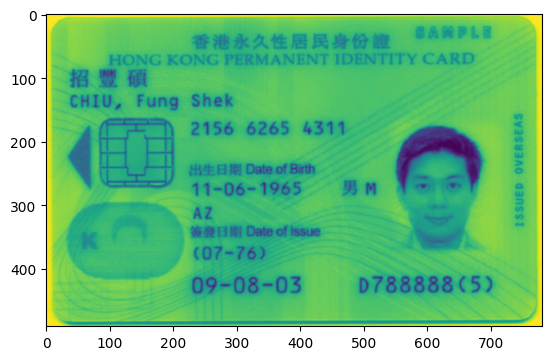

In [184]:
## Noise Removal / Black
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
plt.imshow(gray)


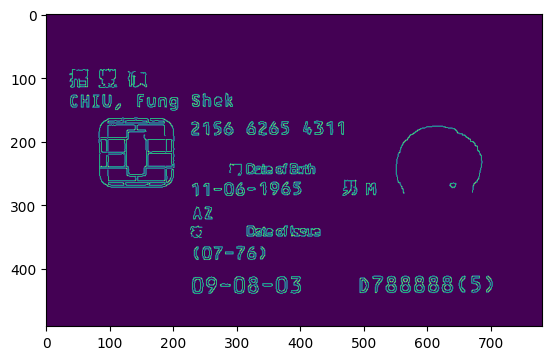

In [186]:
# Canny Edge Finding
canned = cv2.Canny(gray, 150, 300)
plt.imshow(canned)


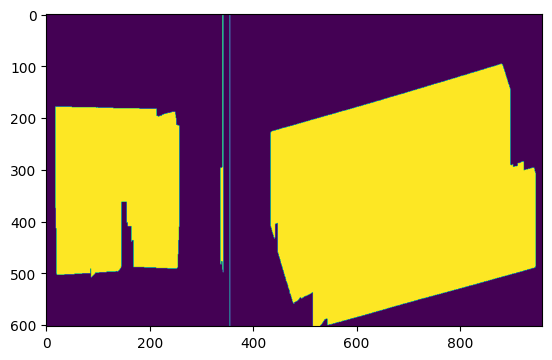

In [144]:
# Connection Edges
kernel = np.ones((10,1),np.uint8) # 가로 1 세로 10
mask = cv2.dilate(canned, kernel, iterations = 20)
plt.imshow(mask)

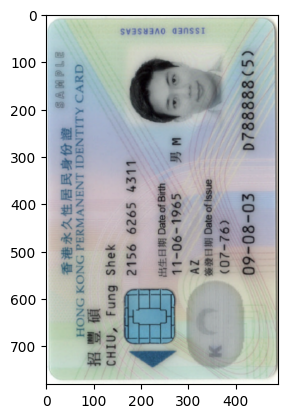

In [201]:
# Tilted Image
src = cv2.imread('/gdrive/My Drive/kyc/hkidSampleTilted.png', 1)
plt.imshow(src)

In [187]:
# Find out the contours
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Finding Biggest contours
biggest_cntr = None
biggest_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > biggest_area:
        biggest_area = area
        biggest_cntr = contour

# Outline box
rect = cv2.minAreaRect(biggest_cntr)
box = cv2.boxPoints(rect)
box = np.int0(box)


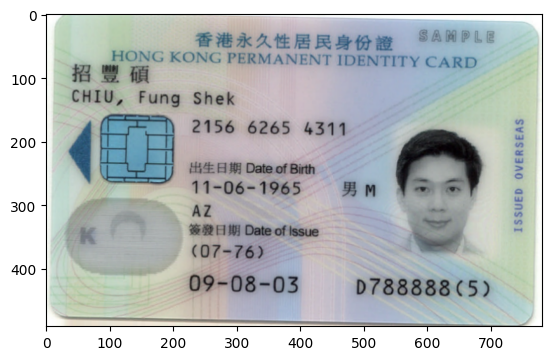

In [199]:
# Angle Calculation
angle = rect[-1]
if angle > 45:
    angle = -(75 - angle)

# Regulating Tilt
rotated = src.copy()
(h, w) = rotated.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(rotated, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

plt.imshow(rotated)

In [200]:

ones = np.ones(shape=(len(box), 1))
points_ones = np.hstack([box, ones])
transformed_box = M.dot(points_ones.T).T

y = [transformed_box[0][1], transformed_box[1][1], transformed_box[2][1], transformed_box[3][1]]
x = [transformed_box[0][0], transformed_box[1][0], transformed_box[2][0], transformed_box[3][0]]

y1, y2 = int(min(y)), int(max(y))
x1, x2 = int(min(x)), int(max(x))

# crop
crop = rotated[y1:y2, x1:x2]


plt.imshow(crop)

#Thank you indeed for your evaluation!